melakukan import

In [1]:
# visualisasi data
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Processing data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition

import fie CSV ke google colab

In [2]:
# Import file CSV dari File Explorer
from google.colab import files
uploaded = files.upload()

Saving marketplace.csv to marketplace.csv


1. Berapa banyak observasi yang ada dalam dataset? Dan kolom mana yang tidak memiliki nilai duplikat / nilai unik?


In [3]:
# Read data marketplace
marketplace = pd.read_csv("marketplace.csv", sep=",", index_col=0)
marketplace.head()

,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
date,,,,,,,,,,,,,,,
3/11/2020,HUAWEI NOVA 5T RAM 8GB INTERNAL 128GB,E1,1.0,PM,Huawei nova 5T,Kota Kediri,False,4500000,1,0,0,0,95,37,74
3/26/2020,Huawei Nova 5T (8GB/128GB) - Crush Green,F1,2.0,OS,Huawei nova 5T,Kota Administrasi Jakarta Utara,False,4999000,5,0,0,0,0,0,2
3/23/2020,HUAWEI NOVA 5T RAM 8/128 GARANSI RESMI HUAWEI ...,F2,3.0,PM,Huawei nova 5T,Kota Administrasi Jakarta Barat,False,4589900,16,0,0,0,96,12,19
4/29/2020,HUAWEI NOVA 5T RAM 8/128GB GARANSI RESMI HUAWE...,E2,4.0,OS,Huawei nova 5T,Kota Surabaya,False,4698500,5,0,0,0,99,42,63
4/15/2020,nokia 3310 reborn,C1,5.0,RM,Nokia 1,Kab. Bangkalan,True,1000000,999999,0,0,3,100,18,82


In [4]:
# mengetahui jumlah baris dan kolom
marketplace.shape

(26014, 15)

In [5]:
# Melihat apakah ada data duplikat secara satuan
dup = marketplace.duplicated()
print(dup.sum())

2220


In [6]:
# melihat data duplikat perkolom atau baris
marketplace_2=[]
data_duplikat=0
for i in marketplace:
  for j in marketplace_2:
      if i == j:
        data_duplikat+=1
        print("Ada",data_duplikat,"data yang duplikat")
      else:
        marketplace_2.append(i)
        
if data_duplikat==0:
  print("Tidak ada data yang duplikat")

Tidak ada data yang duplikat


In [7]:
# Melihat kolom yang unique
marketplace.nunique()

sku_name          11397
product_id        12120
merchant_code      4094
merchant_badge        3
product_type        361
merchant_city       136
cod                   2
price              3224
stock               799
daily_gmv          2760
daily_sold          137
daily_view          909
rating               30
total_review        558
total_sold         1267
dtype: int64

In [8]:
# Karena masih ada data yang missing jadi harus di bersihkan dahulu
marketplace.isnull().sum()

sku_name          0
product_id        0
merchant_code     7
merchant_badge    0
product_type      0
merchant_city     0
cod               0
price             0
stock             0
daily_gmv         0
daily_sold        0
daily_view        0
rating            0
total_review      0
total_sold        0
dtype: int64

In [9]:
# membersihkan missing pada variabel marchant_code
marketplace["merchant_code"]=marketplace["merchant_code"].fillna(marketplace["merchant_code"].mode()[0])

In [10]:
marketplace.isnull().sum()

sku_name          0
product_id        0
merchant_code     0
merchant_badge    0
product_type      0
merchant_city     0
cod               0
price             0
stock             0
daily_gmv         0
daily_sold        0
daily_view        0
rating            0
total_review      0
total_sold        0
dtype: int64

2. Periksa tipe data dalam dataset. Lakukan beberapa perubahan tipe data jika ada tipe data yang salah.

In [11]:
# Tipe data dari vaiabel merchant_code akan di ubah ke int
marketplace.dtypes

sku_name           object
product_id         object
merchant_code     float64
merchant_badge     object
product_type       object
merchant_city      object
cod                  bool
price               int64
stock               int64
daily_gmv           int64
daily_sold          int64
daily_view          int64
rating              int64
total_review        int64
total_sold          int64
dtype: object

In [12]:
# Mengubah tipe data dari variabel "merchat_code" menjadi intiger
marketplace["merchant_code"] = marketplace["merchant_code"].astype("int")
marketplace.dtypes

sku_name          object
product_id        object
merchant_code      int64
merchant_badge    object
product_type      object
merchant_city     object
cod                 bool
price              int64
stock              int64
daily_gmv          int64
daily_sold         int64
daily_view         int64
rating             int64
total_review       int64
total_sold         int64
dtype: object

3. Apakah ada nilai dalam variabel yang nol? Yang mana Jika ada beberapa variabel null pada dataset tersebut, silahkan isi nilainya dengan 0.


In [13]:
'''variabel null telah di ubah ke 0 (pada nomor 1) karena untuk bisa merubah tipe data
data harus di ubah ke 0 dahulu'''
marketplace.isnull().sum()

sku_name          0
product_id        0
merchant_code     0
merchant_badge    0
product_type      0
merchant_city     0
cod               0
price             0
stock             0
daily_gmv         0
daily_sold        0
daily_view        0
rating            0
total_review      0
total_sold        0
dtype: int64

4. Apa jenis produk kategori yang dijual dalam kumpulan data?


In [14]:
marketplace["product_type"].unique()

array(['Huawei nova 5T', 'Nokia 1', 'Oppo A7', 'Oppo A9', 'Oppo F3',
       'Oppo F5', 'Oppo F7', 'vivo S1', 'vivo V5', 'vivo V7', 'vivo V9',
       'Honor 7S', 'Oppo A1k', 'Oppo A37', 'Oppo A39', 'Oppo A3s',
       'Oppo A57', 'Oppo A83', 'Oppo A91', 'Oppo F11', 'Oppo F1s',
       'Realme 2', 'Realme 6', 'vivo V15', 'vivo Y12', 'vivo Y15',
       'vivo Y17', 'vivo Y19', 'vivo Y71', 'vivo Y81', 'vivo Y83',
       'vivo Y93', 'vivo Y95', 'Realme C1', 'Vivo Y91C', 'Infinix S5',
       'vivo NEX A', 'vivo Z1Pro', 'Oppo Reno A', 'Apple iPhone',
       'Oppo F1 Plus', 'Oppo F11 Pro', 'Oppo F3 Plus', 'Oppo Reno2 F',
       'vivo V15 Pro', 'vivo V17 Pro', 'vivo V5 Plus', 'Huawei nova 2',
       'Infinix Hot 5', 'Infinix Hot 8', 'Oppo A5 (AX5)', 'Oppo F5 Youth',
       'Xiaomi Mi Max', 'vivo iQOO Pro', 'Apple iPhone 4',
       'Apple iPhone 5', 'Apple iPhone 6', 'Apple iPhone 7',
       'Apple iPhone 8', 'Apple iPhone X', 'Huawei Mate 10',
       'Huawei P20 Pro', 'Huawei nova 3i', 'Infinix Ho

5. Jenis produk apa yang termasuk dalam 3 produk teratas dalam penjualan?


In [15]:
marketplace.groupby("product_type")["total_sold"].sum().sort_values(ascending=False).head(3)
# Melihat produk 3 teratas dengan grouby

product_type
Samsung Galaxy A10s    525852
Xiaomi Redmi 6A        332426
Realme 6               277352
Name: total_sold, dtype: int64

6. Berdasarkan produk teratas pertama. Berapa harga rata-rata, dan seberapa bervariasinya harga jual? dan menampilkan visualisasi distribusi harga dengan histogram.

In [16]:
# Karena produk teratasnya adalah Samsung Galaxy A10s
produk_teratas = marketplace[marketplace["product_type"]=="Samsung Galaxy A10s"]
produk_teratas

,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
date,,,,,,,,,,,,,,,
4/8/2020,Samsung A10S 2/32 garansi resmi - Random,E159,676,RM,Samsung Galaxy A10s,Kab. Bantul,False,1581000,0,1581000,1,19,100,50,186
4/26/2020,SAMSUNG GALAXY A10S 2GB 32GB GARANSI RESMI SEIN,E160,43,RM,Samsung Galaxy A10s,Kota Administrasi Jakarta Utara,False,1650000,17,0,0,2,99,25,26
4/18/2020,Samsung A10s New Garansi Resmi,F122,677,RM,Samsung Galaxy A10s,Kab. Bantul,False,1609400,10,0,0,2,100,21,73
4/15/2020,SAMSUNG GALAXY A10S - [2/32] - GARANSI RESMI S...,E161,678,RM,Samsung Galaxy A10s,Kota Administrasi Jakarta Utara,False,1589900,3,0,0,11,100,21,329
4/14/2020,Samsung A10s New Garansi Resmi,F122,677,RM,Samsung Galaxy A10s,Kab. Bantul,False,1609400,10,0,0,7,100,21,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/4/2020,Samsung Galaxy A10s 2/32 RAM 2GB ROM 32GB GARA...,E3287,805,OS,Samsung Galaxy A10s,Kota Administrasi Jakarta Pusat,False,1621000,7,25936000,16,565,98,529,4100
4/6/2020,Samsung Galaxy A10s 2/32 2GB 32GB Garansi Resm...,E328,819,OS,Samsung Galaxy A10s,Kota Administrasi Jakarta Pusat,False,1650000,8,3300000,2,236,94,35,241
4/18/2020,Samsung Galaxy A10S Smartphone [32GB/ 2GB] Red...,E324,822,OS,Samsung Galaxy A10s,Kota Administrasi Jakarta Pusat,False,1629000,18,3258000,2,32,98,36,203


In [17]:
# Menghitung harga rata-rata dari Samsung Galaxy A10s
rata_rata = produk_teratas["price"].mean()
print("Rata-rata harga dari produk Samsung GalaxyA10s adalah ", rata_rata)

Rata-rata harga dari produk Samsung GalaxyA10s adalah  1622650.8446327683


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


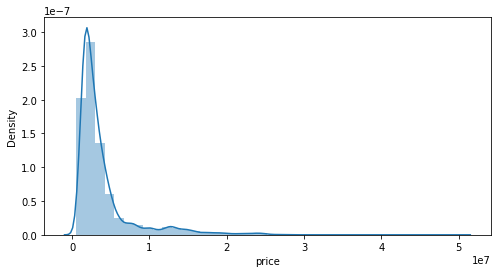

In [18]:
# Melihat distribusi harga dengan histrogram
plt.figure(figsize=(8,4))
sns.distplot(marketplace["price"], bins=40)

7. Filter dataset hanya dengan 'Samsung Galaxy A10s', dan temukan 3 kota pedagang terlaris. Tunjukkan dengan beberapa boxplot distribusi harga antara kota pedagang 3 teratas itu!


In [19]:
# Melihat kota dengan penjualan Samsung Galaxy A10s terlaris
filter = marketplace[marketplace["product_type"] == "Samsung Galaxy A10s"]
filter.groupby("merchant_city")["total_sold"].mean().sort_values(ascending=False).head(3)

merchant_city
Kota Tangerang                     1066.743590
Kab. Bantul                         781.203390
Kota Administrasi Jakarta Pusat     751.294737
Name: total_sold, dtype: float64

In [20]:
# Tampilan boxplot
kota = ["Kota Tangerang", "Kab. Bantul", "Kota Administrasi Jakarta Pusat"]
filter_kota = marketplace[marketplace["merchant_city"].isin(kota)]
plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

8. Ujilah perbedaan total_sold produk Samsung Galaxy A10s dengan Xiaomi Redmi 6A menggunakan t-sample test


In [21]:
from scipy.stats import  ttest_ind
import numpy as np
samsung = marketplace[marketplace["product_type"] == "Samsung Galaxy A10s"]["total_sold"]
xiaomi = marketplace[marketplace["product_type"] == "Xiaomi Redmi 6A"]["total_sold"]

#Rata-rata penjualan dari Samsung dan Xiaomi
samsung_mean = np.mean(samsung)
xiaomi_mean = np.mean(xiaomi)
print("Rata-rata penjualan Samsung galaxy A10s : ", samsung_mean)
print("Rata-rata penjualan Xiaomi Redmi 6A : ", xiaomi_mean)

print(70*"_")
#Selisih Penjualan Samsung dan Xiaomi
selisih = samsung_mean - xiaomi_mean
print("Selisih penjualan : ",selisih)

print("\n\n")
'''Karena selisih penjualannya mencapai rata-rata 50 unit penjualan, maka ada perbedaan yang signifikan antara Samsung Galaxy A10s dan Xiaomi Redmi 6A''' 


Rata-rata penjualan Samsung galaxy A10s :  495.1525423728813
Rata-rata penjualan Xiaomi Redmi 6A :  445.0147255689424
______________________________________________________________________
Selisih penjualan :  50.137816803938904





'Karena selisih penjualannya mencapai rata-rata 50 unit penjualan, maka ada perbedaan yang signifikan antara Samsung Galaxy A10s dan Xiaomi Redmi 6A'

9. Berikan kesimpulan dari jawaban yang telah didapatkan dari poin 1-8



1. Banyak observasi yang ada dalam dataset adalah 26014 baris dan 15 kolom
2. Dataset menggunakan tipe_data Intiger, Boolean dan ada 1 Float namun telah saya ubah ke Integer
3. Ada 1 variabel null yaitu merchant_code dan telah saya ubah menjadi 0
4. Ada sekitar 361 jenis produk yang di jual
5. Ada 3 Produk teratas : Samsung galaxy A10s, Xiaomi Redmi 6A, dan Realmi 6
6. Rata-rata harga teratas dari produk Samsung GalaxyA10s adalah  1622650.8446327683
7. Kota dengan penjualan produk Samsung Galaxy A10s terbanyak yaitu : Kota Tangerang, kab. Bantul, dan Kota Administrasi Jakarta Pusat
8. Persebaran distribusi harga condong ke kiri dan memiliki ekor di kanan. Dapat dilihat juga rata-rata selisih yang mencapai sekitar 50 membuktikan bahwa maka ada perbedaan yang signifikan antara Samsung Galaxy A10s dan Xiaomi Redmi 6A